# Credit Card Default Prediction
### Importing libraries

In [36]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Exploration and Cleaning

In [37]:
# Reading the CSV file
data = pd.read_csv('UCI_Credit_Card.csv')
# Size of the data
print('Size of the data: ',data.shape)

Size of the data:  (30000, 25)


- There are 30000 Rows/Clients and 25 features/columns

In [38]:
# Sample data
data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [39]:
# Looking at Datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [40]:
# Renaming Columns
data = data.rename(columns={'PAY_0': 'PAY_1', 'default.payment.next.month': 'default'})

In [41]:
# Checking for any null values
data.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

- There are no null values found

In [42]:
# Categories of Categorical Features
print('Repayment Status: ',data['PAY_1'].unique())
print('Marriage: ',data['MARRIAGE'].unique())
print('Gender: ',data['SEX'].unique())
print('Education: ',data['EDUCATION'].unique())
print('Target Default: ',data['default'].unique())

Repayment Status:  [ 2 -1  0 -2  1  3  4  8  7  5  6]
Marriage:  [1 2 3 0]
Gender:  [2 1]
Education:  [2 1 3 5 4 6 0]
Target Default:  [1 0]


# Exploratory Data Analysis

In [43]:
# Categorizing unnecessary values
others = [0, 5, 6]
# Replace values in Education Column
data.loc[data['EDUCATION'].isin(others), 'EDUCATION'] = 4
# Replacing unnecessary values in Marriage Column
data['MARRIAGE'] = data['MARRIAGE'].replace(0,3)

In [44]:
# Droping the ID column
data = data.drop('ID', axis=1)

In [45]:
data_copy = data.copy()

## Distribution of target variable 'default'

In [46]:
data['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

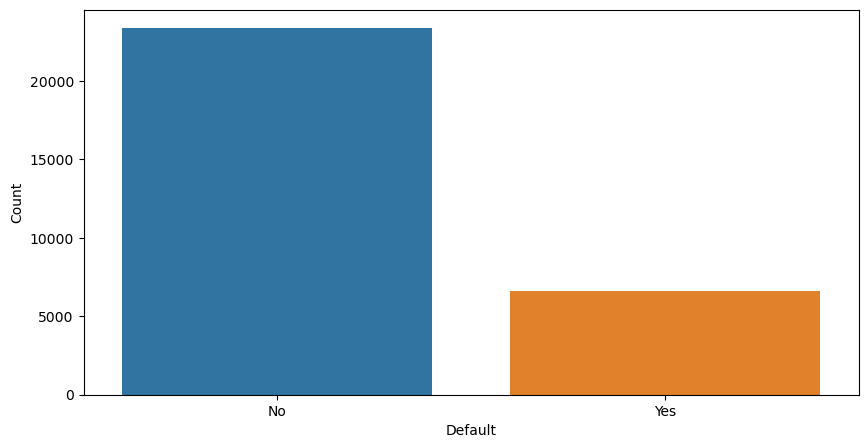

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'default', data = data)
plt.xlabel("Default")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

* We can observe that the data is unbalanced

## Insights on Age

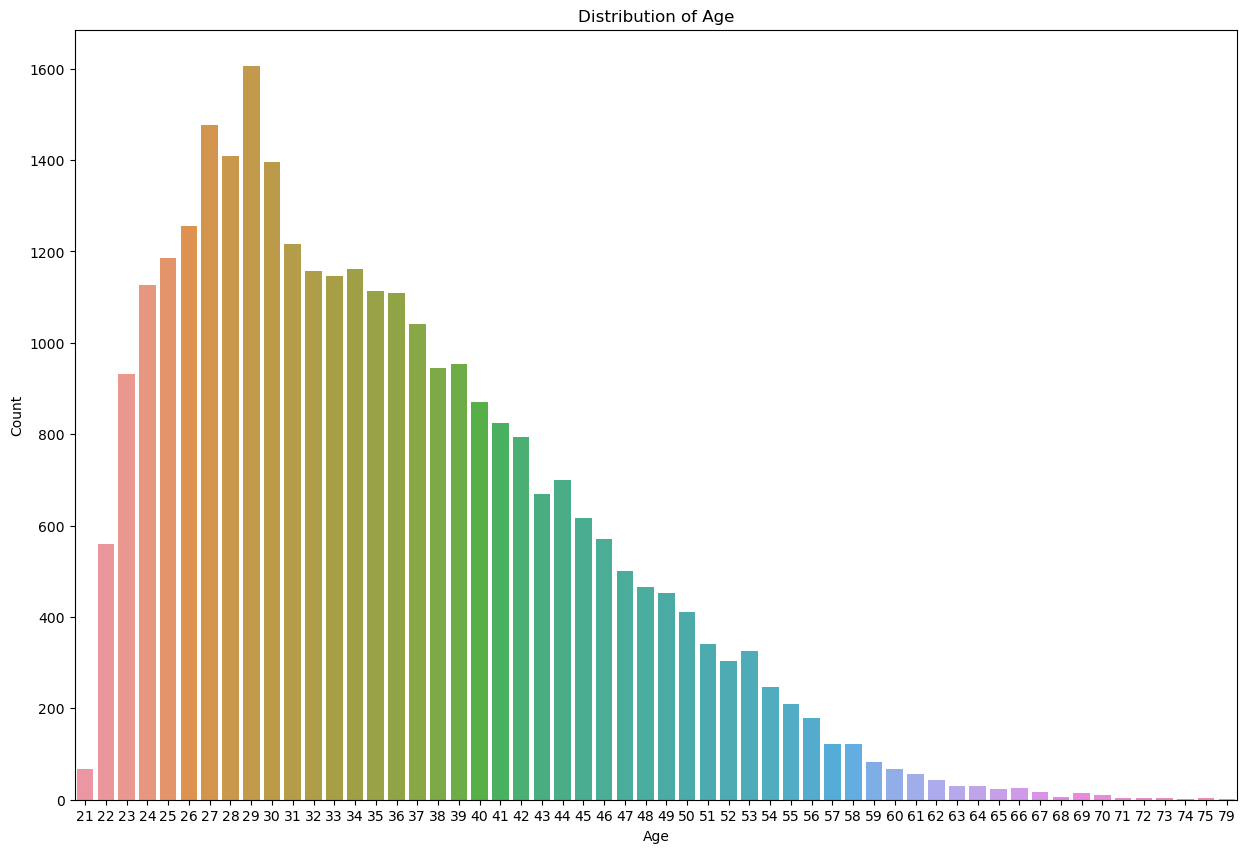

In [48]:
# Age Distribution
ag = data['AGE'].value_counts().reset_index()

plt.figure(figsize=(15, 10))
sns.barplot(x='index', y='AGE', data=ag)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

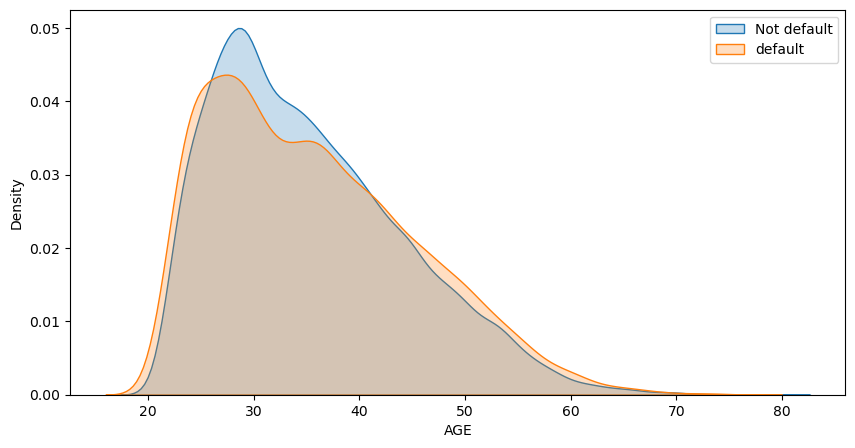

In [49]:
#Distribution of age w.r.t defaults
plt.figure(figsize=(10,5))
sns.kdeplot(data[data['default'] == 0]['AGE'], label = 'Not default', fill = True)
sns.kdeplot(data[data['default'] == 1]['AGE'], label = 'default', fill = True)
plt.legend()
plt.show()

In [50]:
# Creating age bins
data_copy['Age_group'] = pd.cut(data['AGE'],[20, 25, 30, 35, 40, 50, 60, 80])
print(data_copy['Age_group'].value_counts())

(25, 30]    7142
(40, 50]    6005
(30, 35]    5796
(35, 40]    4917
(20, 25]    3871
(50, 60]    1997
(60, 80]     272
Name: Age_group, dtype: int64


In [51]:
# Grouping age w.r.t defaults
data_copy['default'].groupby(data_copy['Age_group']).value_counts(normalize = True)

Age_group  default
(20, 25]   0          0.733402
           1          0.266598
(25, 30]   0          0.798516
           1          0.201484
(30, 35]   0          0.805728
           1          0.194272
(35, 40]   0          0.783811
           1          0.216189
(40, 50]   0          0.767027
           1          0.232973
(50, 60]   0          0.747621
           1          0.252379
(60, 80]   0          0.731618
           1          0.268382
Name: default, dtype: float64

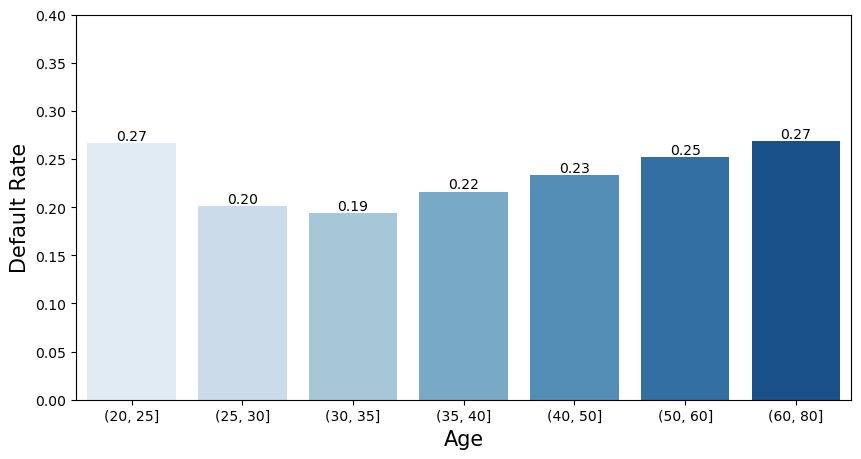

In [52]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x = "Age_group", y = "default", data = data_copy, palette = 'Blues', errorbar=None)

plt.xlabel("Age", fontsize= 15)
plt.ylabel("Default Rate", fontsize= 15)
plt.ylim(0,0.4)

for patch in ax.patches:
    ax.annotate(format(patch.get_height(), '.2f'),(patch.get_x() + patch.get_width() / 2, patch.get_height()),va='bottom', ha='center')

* We can observe that the age group of 30-35 years old has lowest chances for defaulting, while the highest occur at the extremes(20-25 and 60+)

In [53]:
# Renaming for visualization
data_copy.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

## Insights on Gender

<Figure size 1000x500 with 0 Axes>

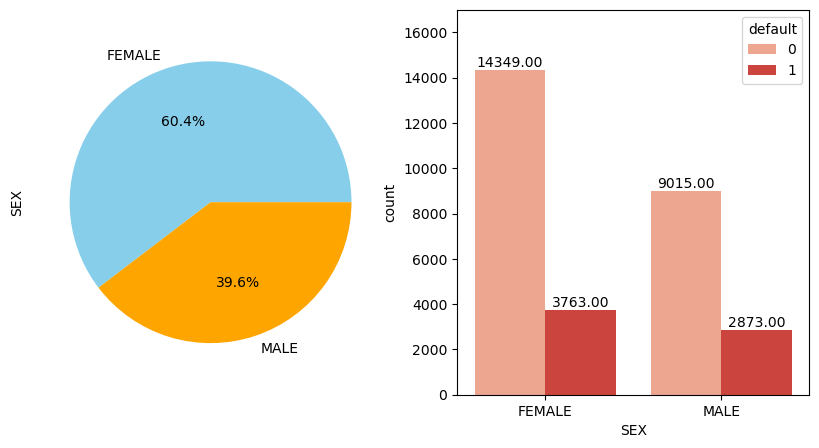

In [54]:
plt.figure(figsize=(10,5))
fig, axes = plt.subplots(ncols=2,figsize=(10,5))

pie_colors = ['skyblue', 'orange']
data_copy['SEX'].value_counts().plot(kind="pie",ax = axes[0],subplots=True, autopct='%1.1f%%', colors=pie_colors)
ax = sns.countplot(x = 'SEX', hue = 'default', data = data_copy, palette='Reds')
plt.ylim(0,17000)
for patch in ax.patches:
    ax.annotate(format(patch.get_height(), '.2f'),(patch.get_x() + patch.get_width() / 2, patch.get_height()),va='bottom', ha='center')

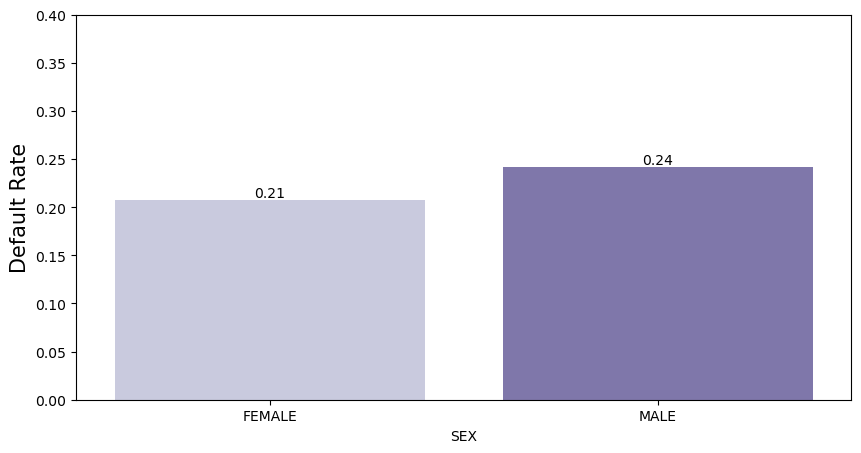

In [55]:
# Grouping w.r.t defaults
data_copy['default'].groupby(data_copy['SEX']).value_counts(normalize = True)

plt.figure(figsize=(10,5))

ax = sns.barplot(x = "SEX", y = "default", data = data_copy, palette='Purples', errorbar=None)

plt.ylabel("Default Rate", fontsize= 15)
plt.ylim(0,0.4)

for patch in ax.patches:
    ax.annotate(format(patch.get_height(), '.2f'),(patch.get_x() + patch.get_width() / 2, patch.get_height()),va='bottom', ha='center')

* There are more women than men in the dataset and, men have a slightly higher chance of default.

## Insights on Marital Status

<Figure size 1000x500 with 0 Axes>

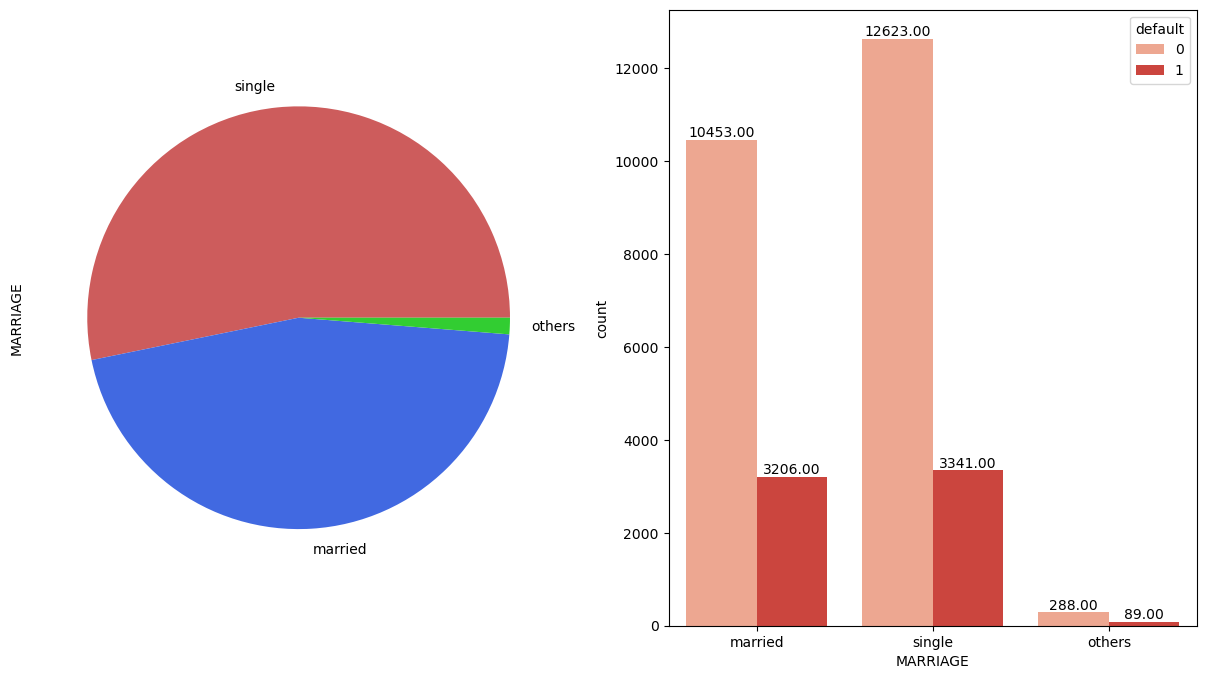

In [56]:
plt.figure(figsize=(10,5))
fig, axes = plt.subplots(ncols=2,figsize=(15,8))
pie_colors = ['indianred','royalblue','limegreen']
data_copy['MARRIAGE'].value_counts().plot(kind="pie",ax = axes[0],subplots=True, colors=pie_colors)
ax = sns.countplot(x = 'MARRIAGE', hue = 'default', data = data_copy, palette='Reds')
for patch in ax.patches:
    ax.annotate(format(patch.get_height(), '.2f'),(patch.get_x() + patch.get_width() / 2, patch.get_height()),va='bottom', ha='center')

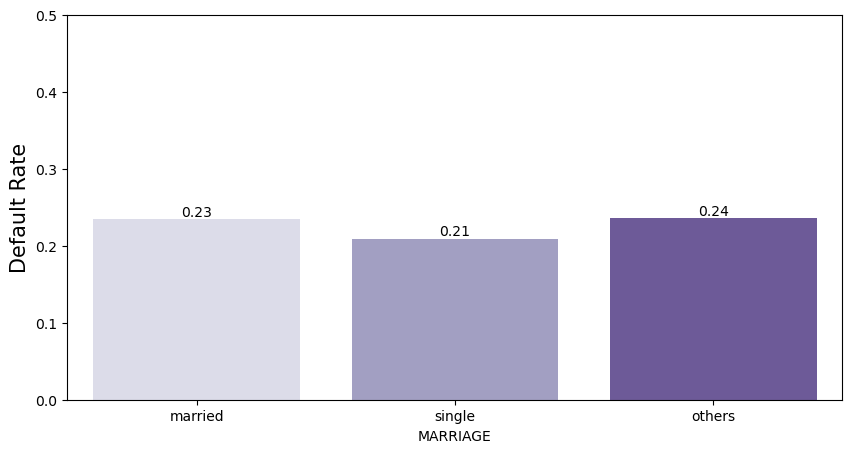

In [57]:
plt.figure(figsize=(10,5))

ax = sns.barplot(x = "MARRIAGE", y = "default", data = data_copy, palette='Purples', errorbar=None)

plt.ylabel("Default Rate", fontsize= 15)
plt.ylim(0,0.5)

for patch in ax.patches:
    ax.annotate(format(patch.get_height(), '.2f'),(patch.get_x() + patch.get_width() / 2, patch.get_height()),va='bottom', ha='center')

* We can observe that Single people have lower chances of defaulting than married and other people.

## Insights on Level of Education

<Figure size 1000x500 with 0 Axes>

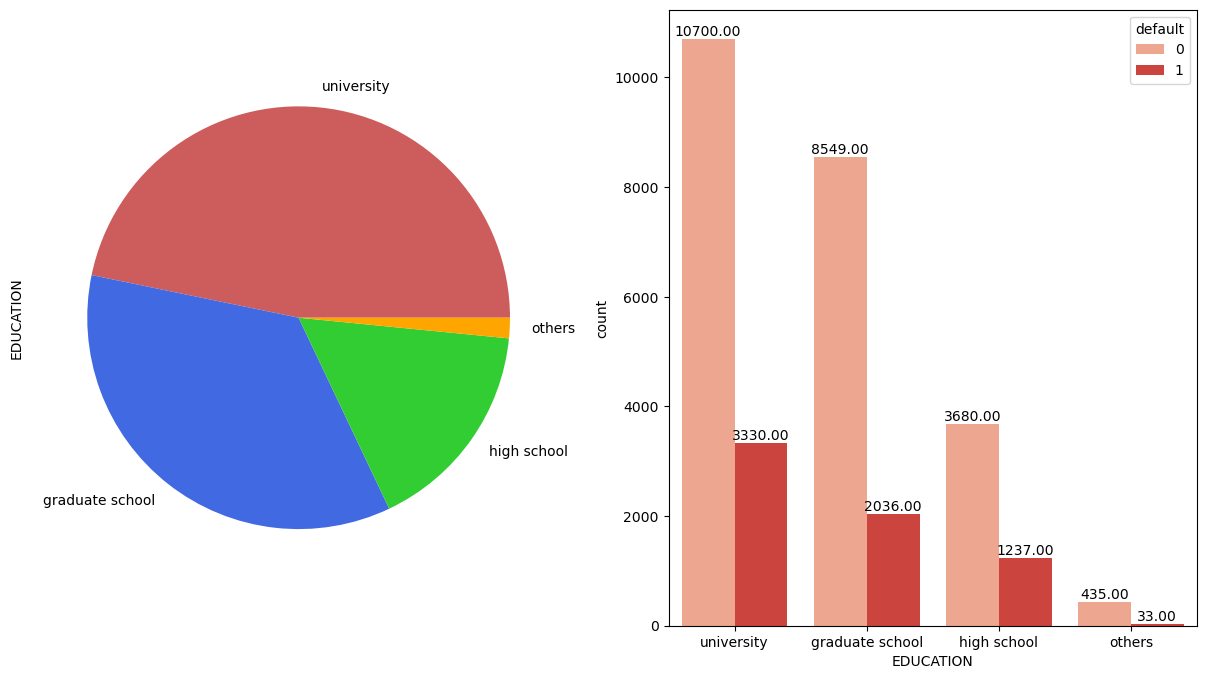

In [58]:
plt.figure(figsize=(10,5))
fig, axes = plt.subplots(ncols=2,figsize=(15,8))
pie_colors=['indianred','royalblue','limegreen','orange']
data_copy['EDUCATION'].value_counts().plot(kind="pie",ax = axes[0],subplots=True, colors=pie_colors)
ax = sns.countplot(x = 'EDUCATION', hue = 'default', data = data_copy, palette='Reds')
for patch in ax.patches:
    ax.annotate(format(patch.get_height(), '.2f'),(patch.get_x() + patch.get_width() / 2, patch.get_height()),va='bottom', ha='center')

* The predominant level of education in our dataset is 'University', followed by 'Grad School' and 'Others'.

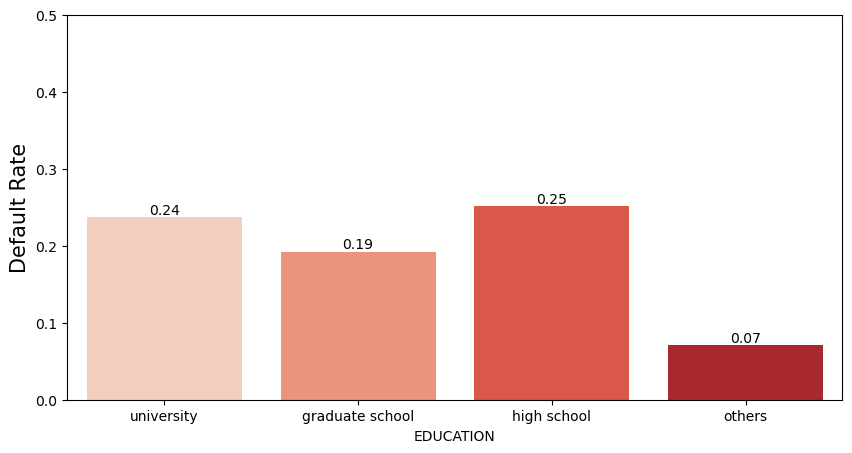

In [59]:
plt.figure(figsize=(10,5))

ax = sns.barplot(x = "EDUCATION", y = "default", data = data_copy, palette = 'Reds', errorbar=None)

plt.ylabel("Default Rate", fontsize= 15)
plt.ylim(0,0.5)

for patch in ax.patches:
    ax.annotate(format(patch.get_height(), '.2f'),(patch.get_x() + patch.get_width() / 2, patch.get_height()),va='bottom', ha='center')

* Considering the level of education, it seems that a higher education translates to a lower chance of default.

## Insights on Credit Limit

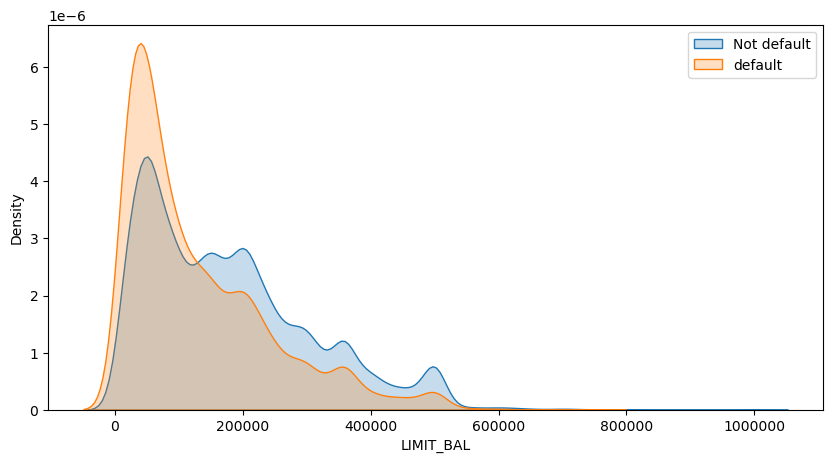

In [60]:
plt.figure(figsize=(10,5))
sns.kdeplot(data[data['default'] == 0]['LIMIT_BAL'], label = 'Not default', fill = True)
sns.kdeplot(data[data['default'] == 1]['LIMIT_BAL'], label = 'default', fill = True)
plt.ticklabel_format(style='plain', axis='x') 
plt.legend()
plt.show()

* Most customers have a credit limit of 200k or less. Also it seems that a higher concentration defaulting occurs in the same range.

In [61]:
#Creating credit limit bins
data_copy['Limit_group'] = pd.cut(data['LIMIT_BAL'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
print(data_copy['Limit_group'].value_counts())

(5000, 50000]        7676
(200000, 300000]     5059
(50000, 100000]      4822
(150000, 200000]     3978
(100000, 150000]     3902
(300000, 400000]     2759
(400000, 500000]     1598
(500000, 1100000]     206
Name: Limit_group, dtype: int64


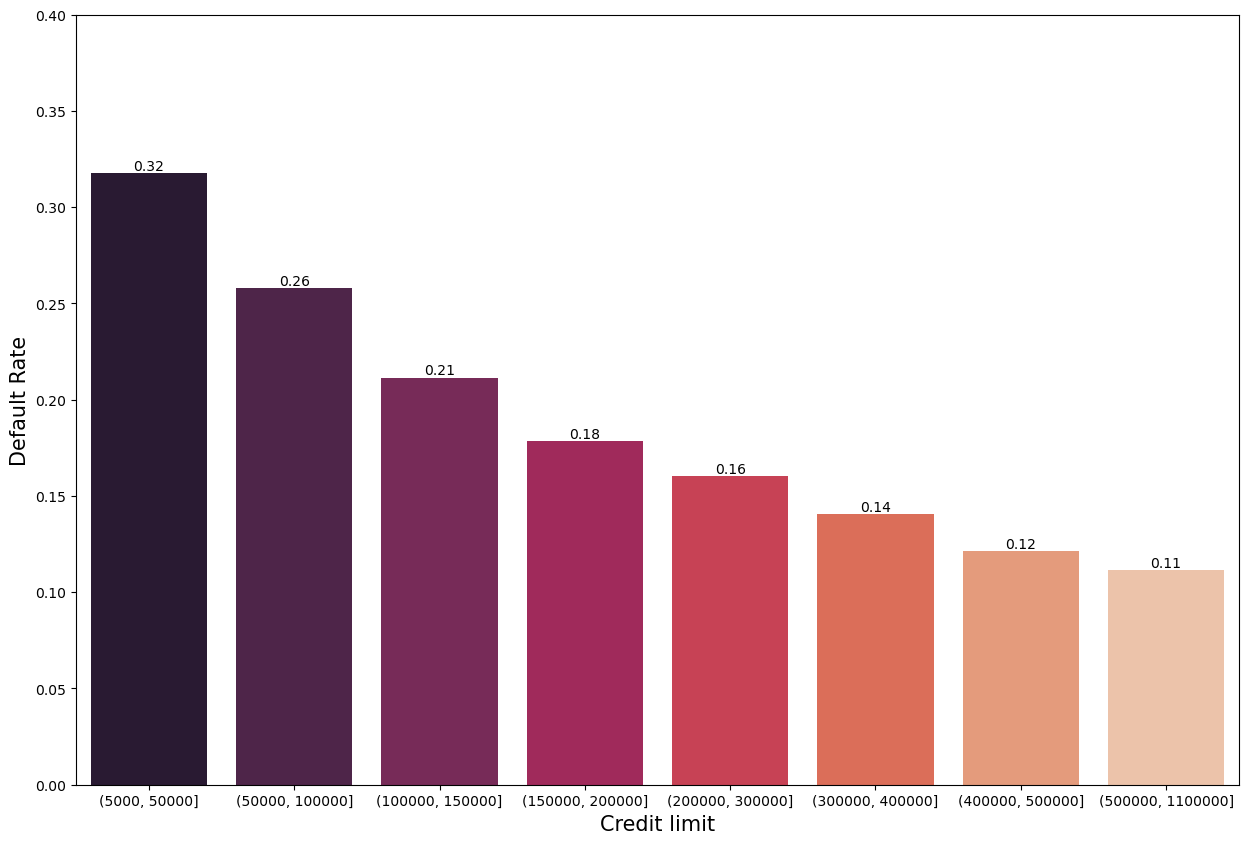

In [62]:
plt.figure(figsize=(15,10))

ax = sns.barplot(x = "Limit_group", y = "default", data = data_copy, palette = 'rocket', errorbar=None)

plt.xlabel("Credit limit", fontsize= 15)
plt.ylabel("Default Rate", fontsize= 15)
plt.ylim(0,0.4)

for patch in ax.patches:
    ax.annotate(format(patch.get_height(), '.2f'),(patch.get_x() + patch.get_width() / 2, patch.get_height()),va='bottom', ha='center')

* Over 30% of default can be observed with credit limit of 50K or less
* Also, the higher the credit limit, the lower is the chance of defaulting

## Insights on Repayment Status

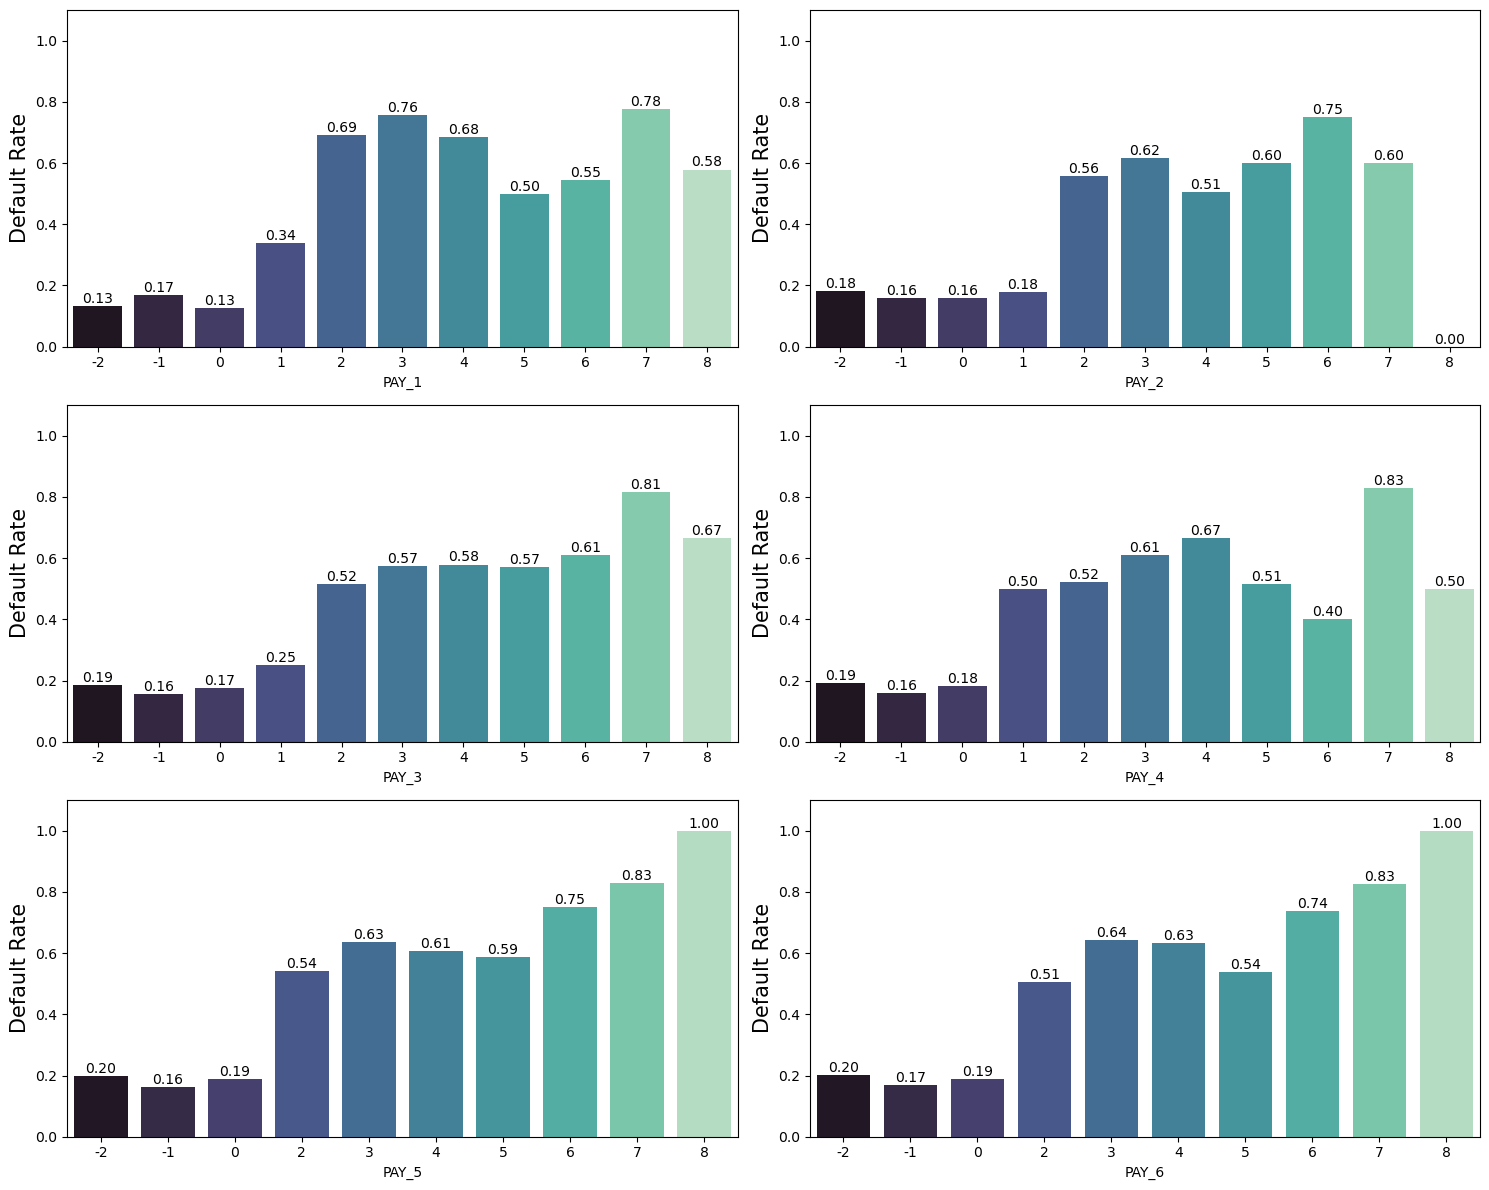

In [63]:
pay_status = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize=(15,12))
for i,col in enumerate(pay_status):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "default", data = data_copy, palette = 'mako', errorbar=None)
    plt.ylabel("Default Rate", fontsize= 15)
    plt.ylim(0,1.1)
    plt.tight_layout()
    for patch in ax.patches:
        ax.annotate(format(patch.get_height(), '.2f'),(patch.get_x() + patch.get_width() / 2, patch.get_height()),va='bottom', ha='center')

* It is observed that the likelihood of default are much lower for the people who duly paid or paying minimum due each month rather than the people who tend to delay their payment over months.

## Insights on Previous Payment

In [64]:
pay_amtx_bins = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for i, col in enumerate (pay_amtx_bins):
    data_copy[col] = pd.cut(data[pay_amtx_bins[i]],[-1, 0, 25000, 50000, 100000, 2000000])

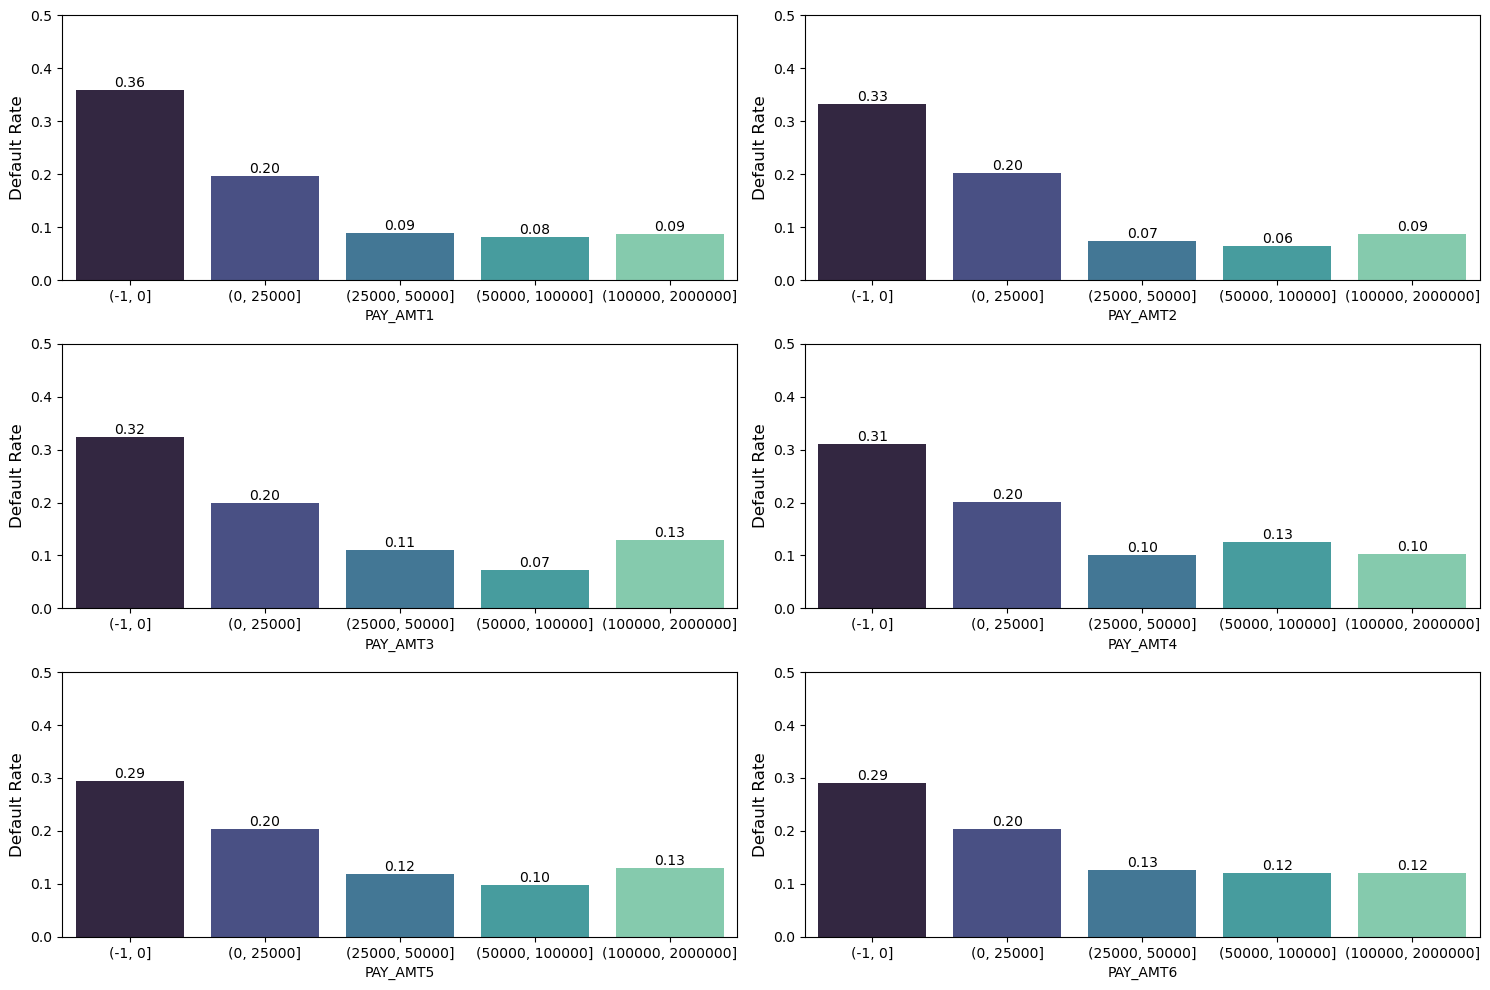

In [65]:
plt.figure(figsize=(15,10))

for i,col in enumerate(pay_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "default", data = data_copy, palette = 'mako', errorbar=None)
    plt.ylabel("Default Rate", fontsize= 12)
    plt.ylim(0,0.5)
    plt.tight_layout()
    for patch in ax.patches:
        ax.annotate(format(patch.get_height(), '.2f'),(patch.get_x() + patch.get_width() / 2, patch.get_height()),va='bottom', ha='center')

* There is a higher default rate among those who paid nothing in previous months and a lower default rate among those who have done payment over 25K.

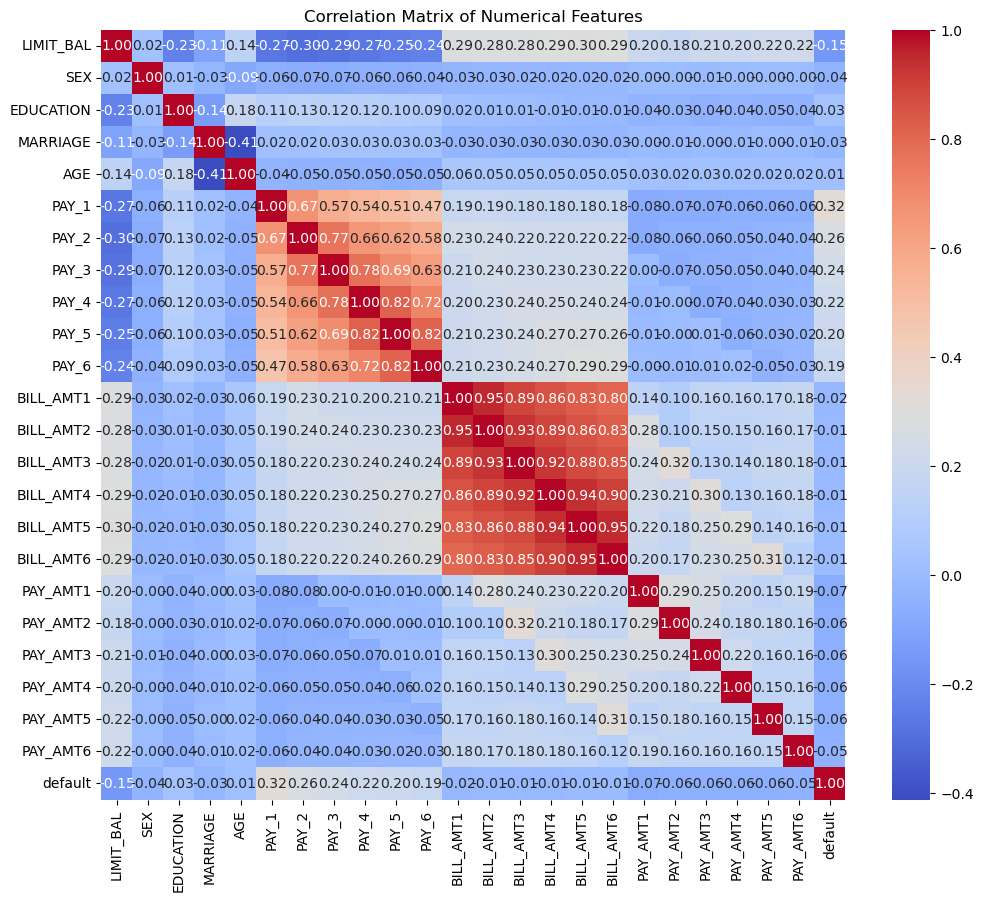

In [66]:
# Checking for Correlation between features
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

* There is a high correlation between bill amounts columns due to its dependence on previous months
* We can calculate the difference between consecutive bill amounts to avoid correlation and this simply refer to the change in bill each month

In [67]:
# Replacing Bill amounts with its difference
for i in range(1, 6):
    data[f'CHANGE_AMT{i}'] = data_copy[f'BILL_AMT{i+1}'] - data_copy[f'BILL_AMT{i}']
    data.drop([f'BILL_AMT{i}'],axis=1,inplace=True)
data.drop(['BILL_AMT6'],axis=1,inplace=True)

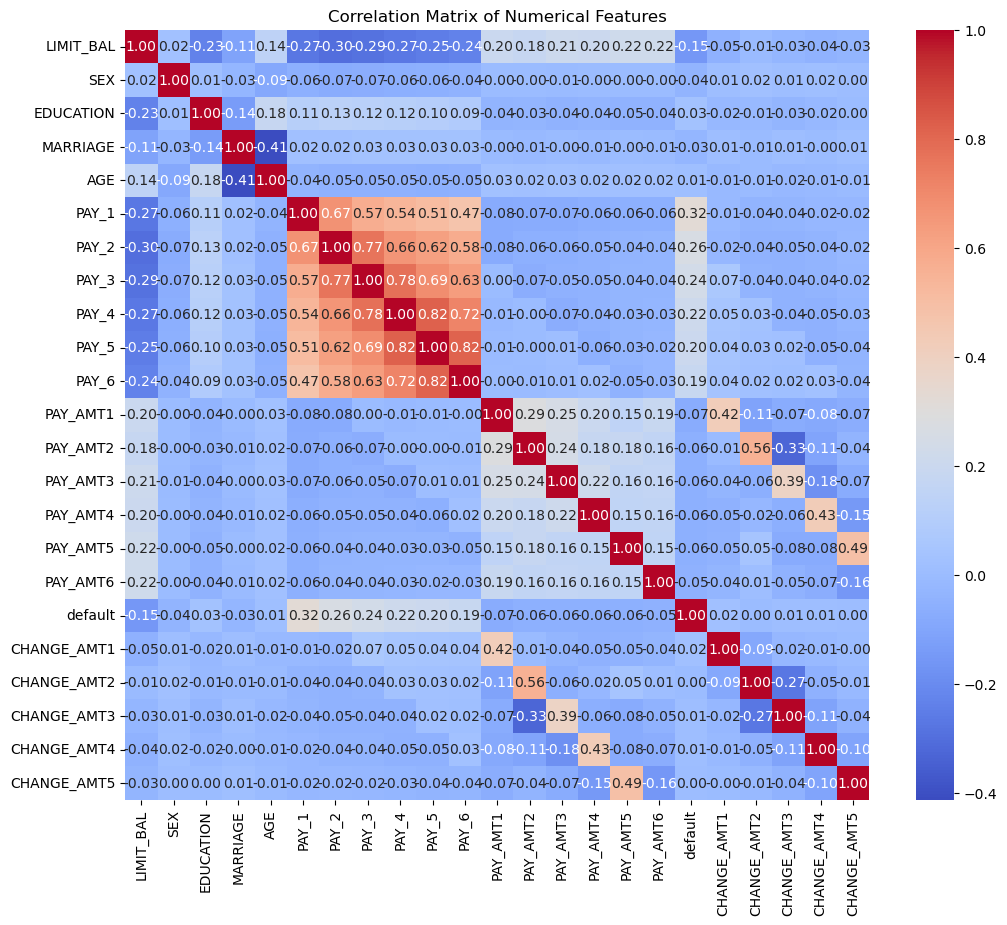

In [68]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

* Now the high correlation between Bill amounts is removed by feature engineering

In [69]:
# Saving the processed data to continue to modelling part
data.to_csv('new_data.csv', index=False)